In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../data/training_data.csv')

# Function to plot a feature against bike demand
"""def plot_feature_vs_demand(data, feature, title):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='increase_stock', data=data)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()"""

"def plot_feature_vs_demand(data, feature, title):\n    plt.figure(figsize=(12, 6))\n    sns.countplot(x=feature, hue='increase_stock', data=data)\n    plt.title(title)\n    plt.xticks(rotation=45)\n    plt.show()"

In [2]:
data.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [4]:
data.shape

(1600, 16)

In [5]:
data.describe()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,3.022500,6.468750,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.0,0.042713,13.082500,64.322375,15.344125
std,6.94837,2.012965,3.454741,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.0,0.421198,7.756652,32.748869,2.323737
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000
25%,5.00000,1.000000,3.000000,0.000000,0.000000,0.00000,7.700000,-0.800000,47.845000,0.000000,0.0,0.000000,7.500000,28.800000,16.000000
50%,12.00000,3.000000,6.000000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.0,0.000000,12.300000,79.300000,16.000000
75%,17.00000,5.000000,9.000000,0.000000,1.000000,1.00000,23.200000,16.800000,79.955000,0.000000,0.0,0.000000,17.600000,92.800000,16.000000
max,23.00000,6.000000,12.000000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,0.0,6.710000,43.800000,100.000000,16.000000


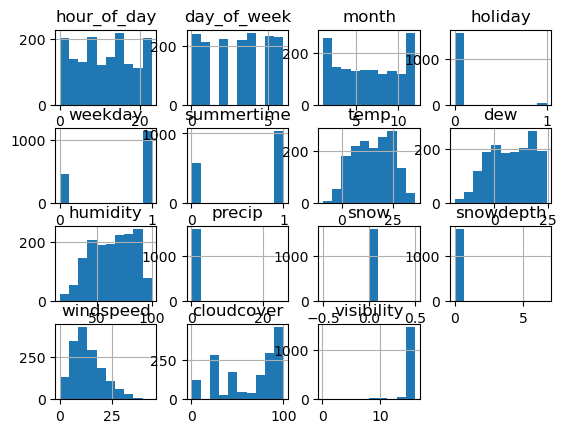

In [6]:
_ = data.hist()

In [18]:
data["increase_stock"].value_counts()

increase_stock
low_bike_demand     1312
high_bike_demand     288
Name: count, dtype: int64

In [21]:
# What percentage of the labels claim "high_bike_demand"?
print(data["increase_stock"].value_counts())
percentage_high_bike_demand = np.sum([1 if row == "high_bike_demand" else 0 for row in data["increase_stock"]]) / data.shape[0]
print(f"percentage: {percentage_high_bike_demand}")

increase_stock
low_bike_demand     1312
high_bike_demand     288
Name: count, dtype: int64
percentage: 0.18


c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

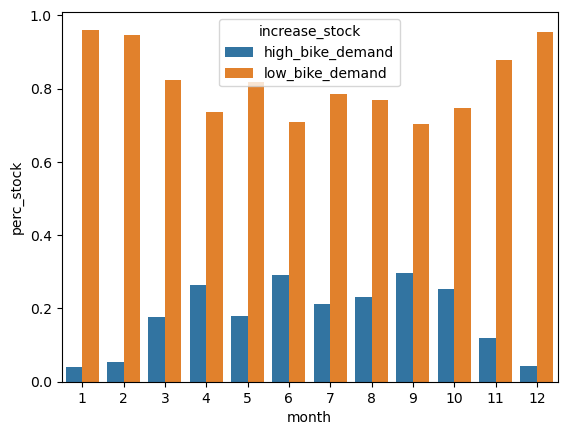

In [193]:
# Percentage of high/low bike demand per month
data_time = data[["month", "hour_of_day","day_of_week","increase_stock"]]
df_month = data_time.groupby(['month', "increase_stock"]).count().reset_index().drop(columns =["day_of_week"])
df_help = data_time["month"].value_counts().reset_index()
df_month = pd.merge(df_month,df_help,left_on= df_month["month"], right_on= df_help["month"], how = "inner").drop(columns =["month_y","key_0"])
df_month = df_month.rename(columns={"hour_of_day": "count_stock","count":"count_month","month_x":"month"})
df_month["perc_stock"] = df_month["count_stock"] / df_month["count_month"]
_ = sns.barplot(data = df_month, x="month",y="perc_stock", hue = "increase_stock")


c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

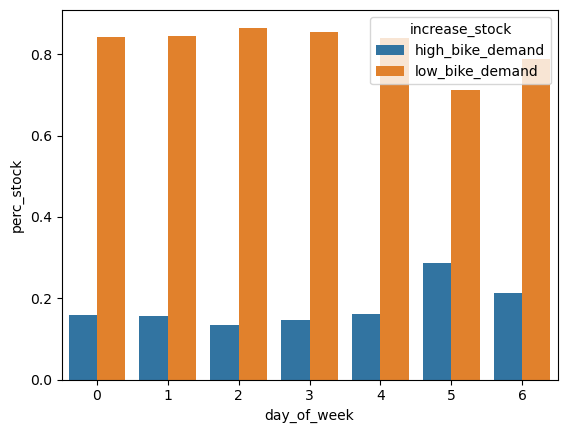

In [208]:
# Percentage of high/low bike demand day of the week
df_weekday = data_time.groupby(['day_of_week', "increase_stock"]).count().reset_index().drop(columns =["month"])
df_help = data_time["day_of_week"].value_counts().reset_index()
df_weekday = pd.merge(df_weekday,df_help,left_on= df_weekday["day_of_week"], right_on= df_help["day_of_week"], how = "inner").drop(columns =["day_of_week_y","key_0"])
df_weekday = df_weekday.rename(columns={"hour_of_day": "count_stock","count":"count_weekday","day_of_week_x":"day_of_week"})
df_weekday["perc_stock"] = df_weekday["count_stock"] / df_weekday["count_weekday"]
_ = sns.barplot(data = df_weekday, x="day_of_week",y="perc_stock", hue = "increase_stock")


c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

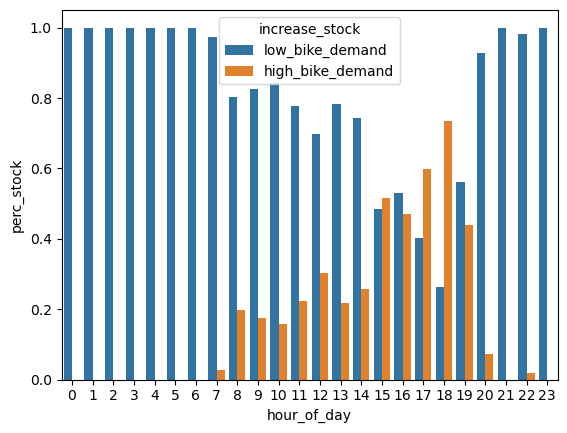

In [217]:
# Percentage of high/low bike demand hour of the day
df_hour = data_time.groupby(['hour_of_day', "increase_stock"]).count().reset_index().drop(columns =["month"])
df_help = data_time["hour_of_day"].value_counts().reset_index()
df_hour = pd.merge(df_hour,df_help,left_on= df_hour["hour_of_day"], right_on= df_help["hour_of_day"], how = "inner").drop(columns =["hour_of_day_y","key_0"])
df_hour = df_hour.rename(columns={"day_of_week": "count_stock","count":"count_hour","hour_of_day_x":"hour_of_day"})
df_hour["perc_stock"] = df_hour["count_stock"] / df_hour["count_hour"]
_ = sns.barplot(data = df_hour, x="hour_of_day",y="perc_stock", hue = "increase_stock")


In [235]:
# Percentage of high/low bike demand day of the week
df_hourday = data_time.groupby(['day_of_week','hour_of_day', "increase_stock"]).count().reset_index()
df_hourday = df_hourday.rename(columns={"month":"count"})

#df_help = data_time[['day_of_week','hour_of_day']].value_counts().reset_index()
#df_weekday = pd.merge(df_weekday,df_help,left_on= df_weekday["day_of_week"], right_on= df_help["day_of_week"], how = "inner").drop(columns =["day_of_week_y","key_0"])
#df_weekday = df_weekday.rename(columns={"hour_of_day": "count_stock","count":"count_weekday","day_of_week_x":"day_of_week"})
#df_weekday["perc_stock"] = df_weekday["count_stock"] / df_weekday["count_weekday"]
#_ = sns.barplot(data = df_weekday, x="day_of_week",y="perc_stock", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

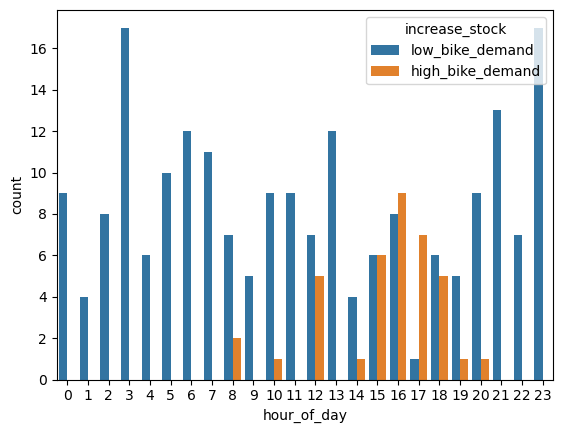

In [240]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==0], x="hour_of_day",y="count", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

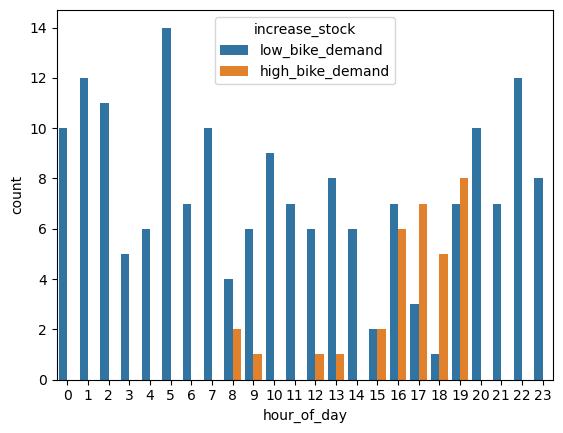

In [241]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==1], x="hour_of_day",y="count", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

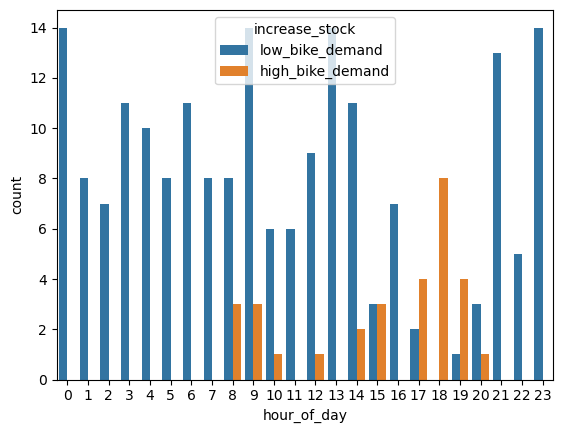

In [242]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==2], x="hour_of_day",y="count", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

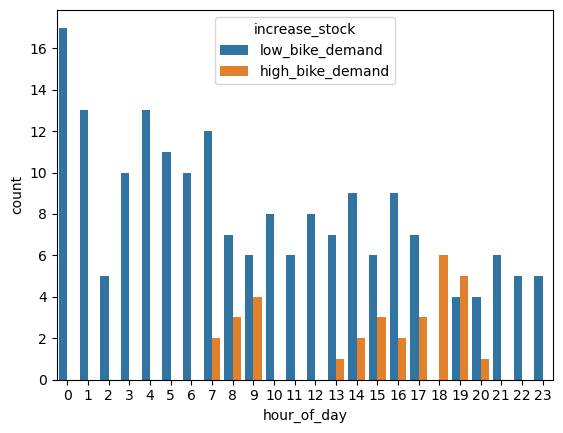

In [243]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==3], x="hour_of_day",y="count", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

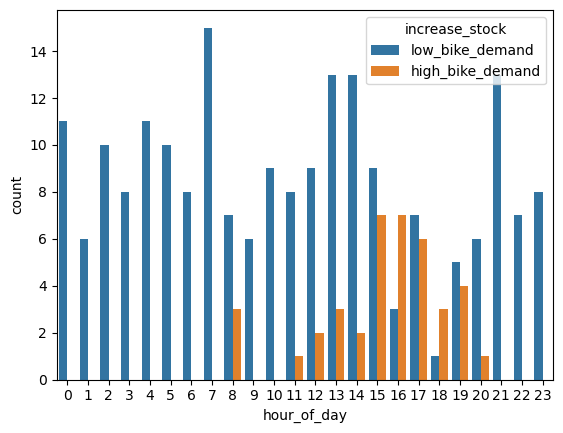

In [244]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==4], x="hour_of_day",y="count", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

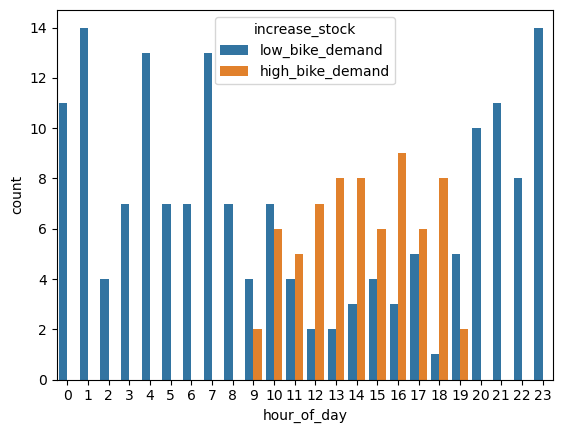

In [245]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==5], x="hour_of_day",y="count", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

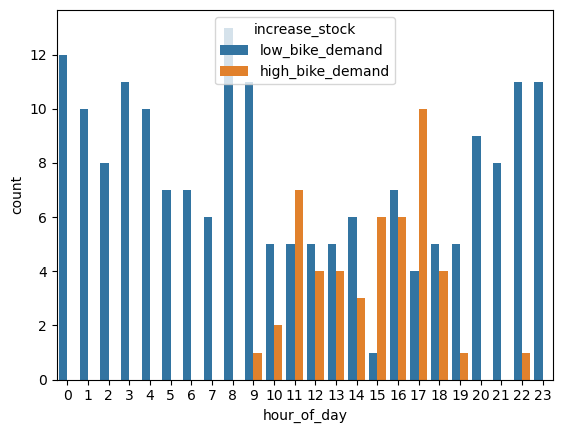

In [246]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==6], x="hour_of_day",y="count", hue = "increase_stock")